1. Implement and demonstrate the FIND-S algorithm to finding the most specific hypothesis based on a given set of data samples. Read the training data from a .CSV file.
2. For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.
3. Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.
4. Assuming a set of documents that need to be classified, use the naïve Bayesian classifier model to perform this task. Built-in Java classes /API can be used to write the program. Calculate the accuracy precision and recall for your data set.
5. Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis the of heart patients using standard heart disease data set. You can use Java or Python ML Library classes /API.
6. Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.
7. Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.
8. Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using K-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java / Python ML library classes/API in the program.
9. Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.
10. Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set your experiment and draw graphs.


1. Implement and demonstrate the FIND-S algorithm to finding the most specific hypothesis based on a given set of data samples. Read the training data from a .CSV file.

Our Code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

def find_s_algorithm(training_data):
    # Initialize the most specific hypothesis
    hypothesis = ['0'] * (len(training_data.columns) - 1)

    for index, row in training_data.iterrows():
        if row.iloc[-1] == 'Yes':  # Positive instance
            for i in range(len(row) - 1):
                if hypothesis[i] == '0':
                    hypothesis[i] = row[i]
                elif hypothesis[i] != row[i]:
                    hypothesis[i] = '?'

    return hypothesis

# Read the dataset from CSV file
file_path = '/content/drive/MyDrive/Sem 6/ML/EnjoySport.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Apply FIND-S algorithm
hypothesis_result = find_s_algorithm(data)

# Display the result
print("The most specific hypothesis is:", hypothesis_result)


The most specific hypothesis is: ['?', '?', 'Normal', '?', '?', '?']


In [ ]:
import numpy as np
file_path = '/content/drive/MyDrive/Sem 6/ML/EnjoySport.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

In [ ]:
data

,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
0,Sunny,Warm,Normal,Strong,Cool,Change,Yes
1,Rainy,Cold,Normal,Light,Warm,Same,Yes
2,Sunny,Warm,Normal,Light,Warm,Same,No
3,Sunny,Cold,Normal,Strong,Warm,Same,Yes


In [ ]:
concepts = np.array(data)[:,:-1]

In [ ]:
concepts

array([['Sunny', 'Warm', 'Normal', 'Strong', 'Cool', 'Change'],
       ['Rainy', 'Cold', 'Normal', 'Light', 'Warm', 'Same'],
       ['Sunny', 'Warm', 'Normal', 'Light', 'Warm', 'Same'],
       ['Sunny', 'Cold', 'Normal', 'Strong', 'Warm', 'Same']],
      dtype=object)

In [ ]:
target = np.array(data)[:,-1]

In [ ]:
target

array(['Yes', 'Yes', 'No', 'Yes'], dtype=object)

Sir's Code:

In [ ]:
import csv
def loadCsv(filename):
  lines = csv.reader(open(filename, "r"))
  dataset = list(lines)
  for i in range(len(dataset)):
    dataset[i] = dataset[i]
  return dataset
attributes = ['Sky','Temp','Humidity','Wind','Water','Forecast']
print('Attributes =',attributes)
num_attributes = len(attributes)
filename = "/content/drive/MyDrive/Sem 6/ML/DATASETS/ENJOYSPORT.csv"
dataset = loadCsv(filename)
print(dataset)
hypothesis=['0'] * num_attributes
print("Intial Hypothesis")
print(hypothesis)
print("The Hypothesis are")
for i in range(1,len(dataset)):
  target = dataset[i][-1]
  if(target == '1'):
    for j in range(num_attributes):
        if(hypothesis[j]=='0'):
          hypothesis[j] = dataset[i][j]
        if(hypothesis[j]!= dataset[i][j]):
          hypothesis[j]='?'
  print(i+1,'=',hypothesis)
print("Final Hypothesis")
print(hypothesis)

Attributes = ['Sky', 'Temp', 'Humidity', 'Wind', 'Water', 'Forecast']
[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'EnjoySport'], ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', '1'], ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', '1'], ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', '0'], ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', '1']]
Intial Hypothesis
['0', '0', '0', '0', '0', '0']
The Hypothesis are
2 = ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
3 = ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
4 = ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
5 = ['Sunny', 'Warm', '?', 'Strong', '?', '?']
Final Hypothesis
['Sunny', 'Warm', '?', 'Strong', '?', '?']


2. For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.

Our Code:

In [ ]:
import csv

with open("/content/drive/MyDrive/Sem 6/ML/DATASETS/EnjoySport.csv") as f:
    csv_file=csv.reader(f)
    data=list(csv_file)

    s=data[1][:-1]
    g=[['?' for i in range(len(s))] for j in range(len(s))]

    for i in data:
        if i[-1]=="Yes":
            for j in range(len(s)):
                if i[j]!=s[j]:
                    s[j]='?'
                    g[j][j]='?'

        elif i[-1]=="No":
            for j in range(len(s)):
                if i[j]!=s[j]:
                    g[j][j]=s[j]
                else:
                    g[j][j]="?"
        print("\nSteps of Candidate Elimination Algorithm",data.index(i)+1)
        print(s)
        print(g)
    gh=[]
    for i in g:
        for j in i:
            if j!='?':
                gh.append(i)
                break

    print("\nFinal specific hypothesis:\n",s)
    print("\nFinal general hypothesis:\n",gh)


Steps of Candidate Elimination Algorithm 1
['Sunny', 'Warm', 'Normal', 'Strong', 'Cool', 'Change']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 2
['Sunny', 'Warm', 'Normal', 'Strong', 'Cool', 'Change']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 3
['?', '?', 'Normal', '?', '?', '?']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 4
['?', '?', 'Normal', '?', '?', '?']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?

Sir' Code:


In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Sem 6/ML/DATASETS/ENJOYSPORT.csv')
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)


def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)
    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == 1:
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

        if target[i] == 0:
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Boundary after ", i+1,"Instance is ",specific_h)
        print("Generic Boundary after ", i+1,"Instance is ",general_h)
        print("\n")


    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h


s_final, g_final = learn(concepts, target)
print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")



Instances are:
 [['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]

Target Values are:  [1 1 0 1]

Initialization of specific_h and genearal_h

Specific Boundary:  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Instance is Positive 
Specific Bundary after  1 Instance is  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



Instance 2 is  

3. Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

In [ ]:
import numpy as np
file_path = '/content/drive/MyDrive/Sem 6/ML/DATASETS/play_tennis.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

X = df.drop('play', axis=1)
X = pd.get_dummies(X)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, df['play'], test_size=0.2, random_state=42)

naive_bayes_classifier = MultinomialNB().fit(X_train, y_train)


y_pred = naive_bayes_classifier.predict(X_test)
print("\nClassification is ",y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nResults:")
print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("Precision: ",precision)
print("\nConfusion Matrix:")
print(conf_matrix)

###4.Assuming a set of documents that need to be classified, use the naïve Bayesian classifier model to perform this task. Built-in Java classes /API can be used to write the program. Calculate the accuracy precision and recall for your data set.4.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
file_path= '/content/drive/MyDrive/Sem 6/ML/DATASETS/text_classification.csv'
df = pd.read_csv(file_path)

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['yes/no'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

nb_classifier = MultinomialNB().fit(X_train_vect, y_train)

y_pred = nb_classifier.predict(X_test_vect)

feature_names = vectorizer.get_feature_names_out()
print("Words or Tokens in the text document:")
print(feature_names,"\n")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['yes', 'no'])

print("Confusion Matrix:\n", conf_matrix,"\n")
print("Accuracy:", round(accuracy, 5),"\n")
print("Precision (Yes):", round(precision, 5),"\n")
print("Recall (Yes):", round(recall, 5))

7.Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [ ]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5000                #Setting training iterations
lr=0.1                    #Setting learning rate
inputlayer_neurons = 2    #number of features in data set
hiddenlayer_neurons = 3   #number of hidden layers neurons
output_neurons = 1        #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))


#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):

#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)

#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)

#how much hidden layer wts contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad

# dotproduct of nextlayererror and currentlayerop
    wout += hlayer_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hiddenlayer) *lr


print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.8965572 ]
 [0.87912005]
 [0.89341835]]


6. Decision Tree

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Sem 6/ML/DATASETS/buys_computer.csv')
df

,Age,Income,Student,Credit Rating,Buys Computer
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31...40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes
5,>40,Low,Yes,Excellent,No
6,31...40,Low,Yes,Excellent,Yes
7,<=30,Medium,No,Fair,No
8,<=30,Low,Yes,Fair,Yes
9,>40,Medium,Yes,Fair,Yes


In [ ]:
import pandas as pd
import math

def entropy(df):
    r = df.index.size
    label = df.columns[-1]
    label_list = list(set(df[label]))
    dfl = df[label].value_counts()
    E = 0
    for i in label_list:
        p = dfl[i] / r
        if p == 0:
            continue
        else:
            E -= p * math.log2(p)
    return round(E, 3)

def information_gain(df, c):
    atr = list(set(df[c]))
    IG = entropy(df)
    r = df.index.size
    for i in atr:
        dfc = df.loc[df[c] == i].drop([c], axis=1)
        rc = dfc.index.size
        IG -= (rc / r) * entropy(dfc)
    return round(IG, 4)

def feature_selection(df):
    lc = list(df.columns)
    lc.pop()
    ig = [information_gain(df, i) for i in lc]
    return lc[ig.index(max(ig))]

def decision_tree_feature(df, feature):
    dfl = list(set(df[feature]))
    d = {}
    for i in dfl:
        dfc = df.loc[df[feature] == i].drop([feature], axis=1)
        if len(set(dfc[dfc.columns[-1]])) == 1:
            d[i] = dfc[dfc.columns[-1]].iloc[0]
        else:
            d[i] = {}
    return d

def decision_tree(df):
    feature = feature_selection(df)
    d = {}
    d[feature] = decision_tree_feature(df, feature)
    for k in d[feature]:
        if isinstance(d[feature][k], dict):
            d[feature][k] = decision_tree(df.loc[df[feature] == k].drop([feature], axis=1))
    return d

def classify(df, e):
    d = decision_tree(df)
    while True:
        for i in d:
            c = i
        d = d[c][e[c]]
        if not isinstance(d, dict):
            print(d)
            break

def print_tree(tree, indent=""):
    for feature, value in tree.items():
        if isinstance(value, dict):
            print(f"{indent}{feature}:")
            print_tree(value, indent + "  ")
        else:
            print(f"{indent}{feature}: {value}")


e={'Age':'<=30','Income':'Medium','Student':'Yes','Credit Rating':'Fair'}
#e={'Outlook':'Sunny','Temp':'Hot','Humidity':'High','Wind':'Weak'}
classify(df,e)

tree = decision_tree(df)
print_tree(tree)

Yes
Age:
  <=30:
    Student:
      Yes: Yes
      No: No
  31...40: Yes
  >40:
    Credit Rating:
      Excellent: No
      Fair: Yes


8. Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using K-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java / Python ML library classes/API in the program.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


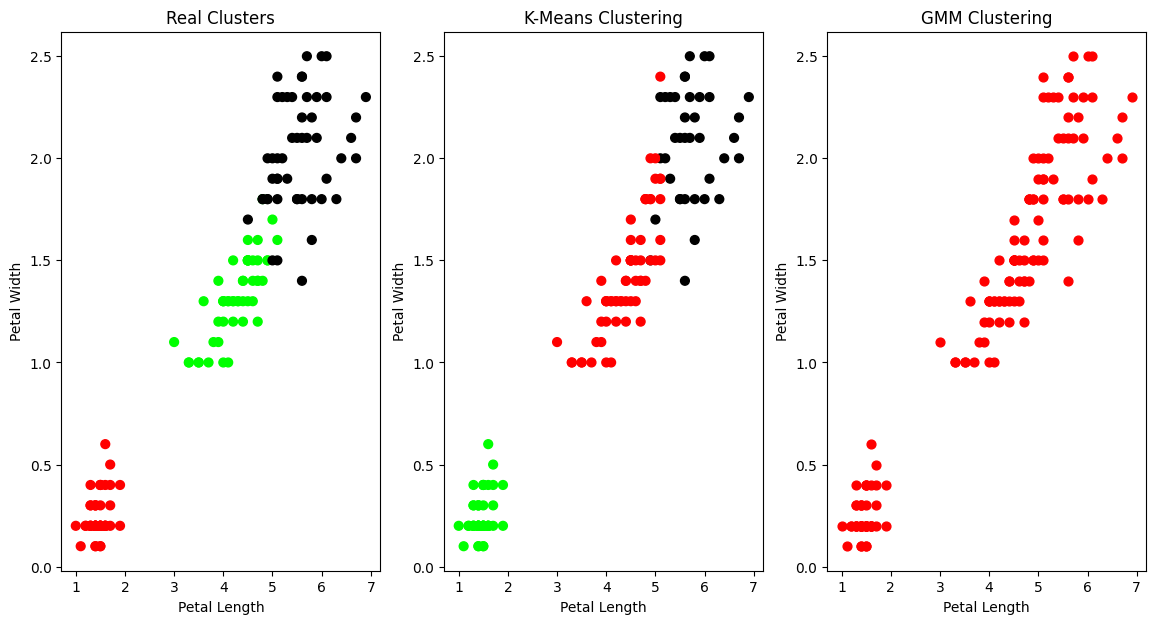

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# General EM for GMM
from sklearn import preprocessing

# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=40)
gmm.fit(xs)
plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[0], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

9. Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris()
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))

    print("Classification Accuracy :" , classifier.score(x_test,y_test));

10. Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set your experiment and draw graphs.

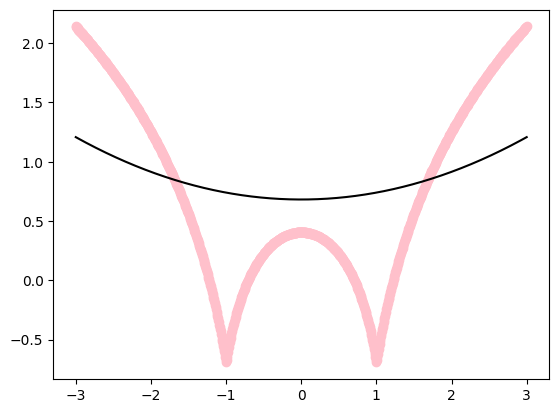

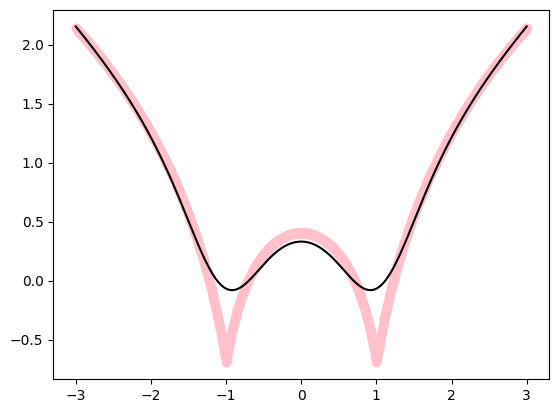

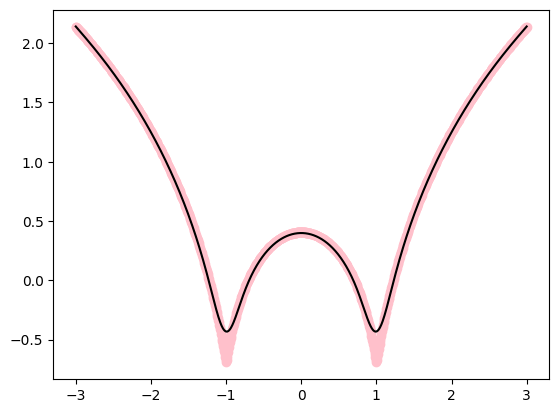

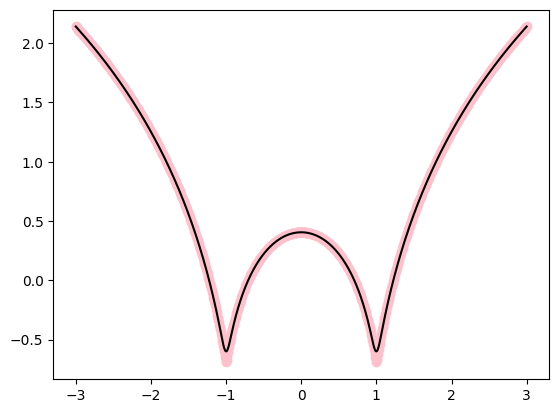

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#data = pd.read_csv('/content/drive/MyDrive/STUDY2/ML LAB/LABCYCLE/ALI/10-dataset.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
def kernel(point, xmat, τ):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m)))

    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2 * τ**2))

    return weights

In [ ]:
def localWeight(point, xmat, ymat, τ):
    wt = kernel(point, xmat, τ)
    W = (X.T * (wt * X)).I * (X.T * wt * ymat.T)
    return W

In [ ]:
def localWeightRegression(xmat, ymat, τ):
    m, n = xmat.shape
    y_pred = np.zeros(m)

    for i in range(m):
        y_pred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, τ)

    return y_pred

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/STUDY2/ML LAB/LABCYCLE/ALI/10-dataset.csv')

colA = np.array(data.total_bill)
colB = np.array(data.tip)

mColA, mColB = np.mat(colA), np.mat(colB)

m = mColB.shape[1]
one = np.ones((1, m), dtype = int)

X = np.hstack((one.T, mColA.T))
print(X.shape)

yPred = localWeightRegression(X, mColB, 0.8)

xsort = X.copy()
xsort.sort(axis = 0)

plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], yPred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()